For anyone else encountering this issue in VSCode embedded in a website:

On Windows: Use Shift + Insert to paste
On Mac: Typically Command + V or Option + Command + V might work as alternatives

## Introduction

https://www.youtube.com/watch?v=P1g0UZa5-sA

## Lesson Objectives
We have already learned how to create and interpret an infrastructure diagram. Now it's time to turn our designs into reality using infrastructure as code.

In this lesson, we will create network resources with CloudFormation, using the following diagram as our guide.

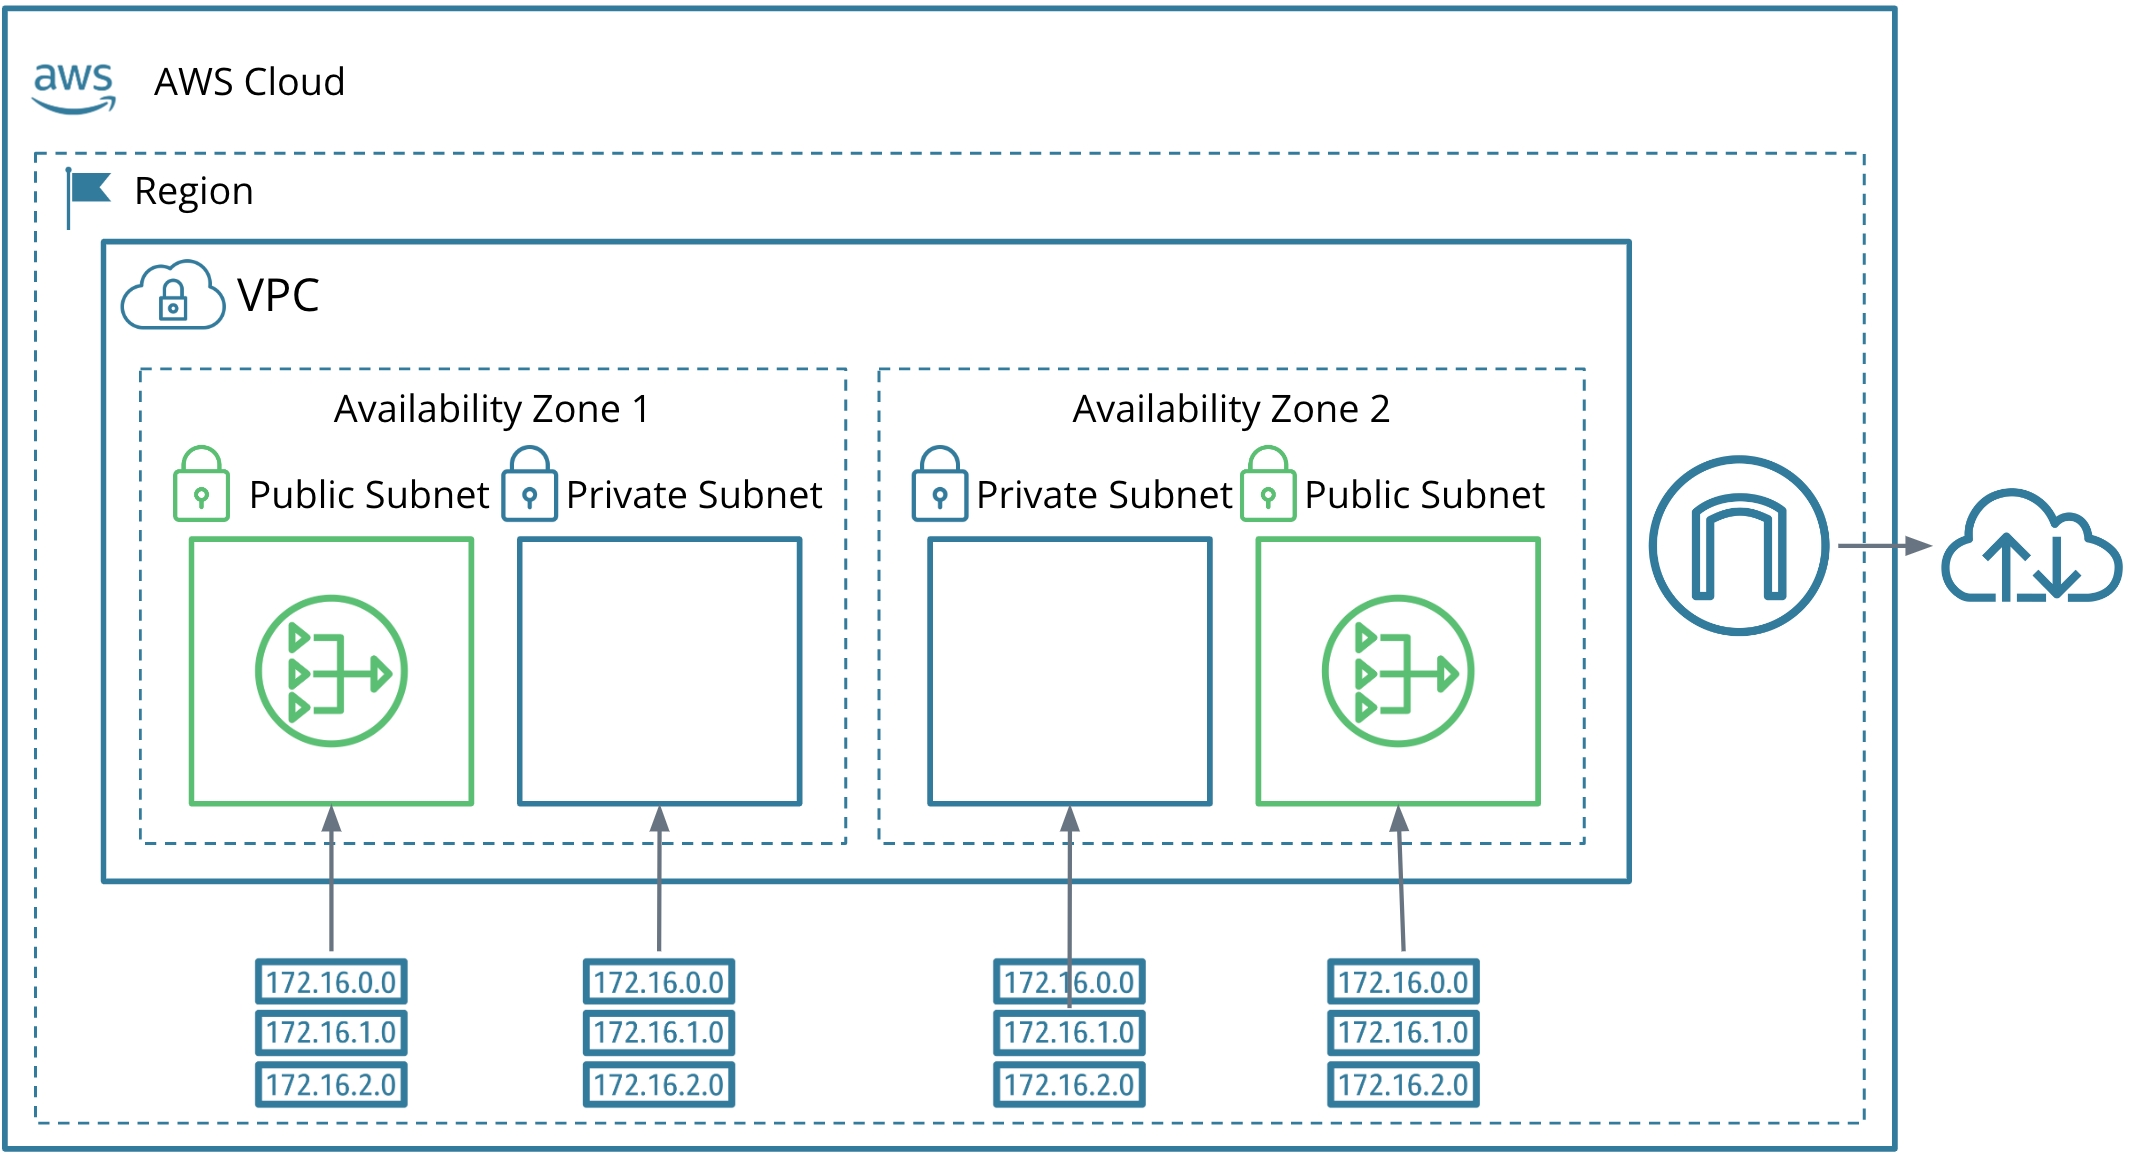

Network Infrastructure Diagram

Upon completion of this lesson, you will be able to:

Use the AWS CloudFormation CLI to trigger infrastructure deployments.
Deploy basic networking AWS resources using CloudFormation (VPC, subnets, gateways, and routing).
Parametrize your CloudFormation stacks using a JSON file.
Communicate CloudFormation stacks using template outputs.

https://github.com/udacity/cd12352-Deploy-Infrastructure-as-Code/

## Workflow and Helpers

https://www.youtube.com/watch?v=3hNeDlLpWyg

create-stack Command
Creates a CloudFormation stack from the specified template. Returns the StackId for the created stack, without waiting for the creation process to complete. Relevant arguments for this course are:

--stack-name: name for the stack, unique per region.

--template-body: file reference to the template.

--parameters: file reference to a JSON file with values for the parameters in the template.

--capabilities: additional capabilities required by your stack to execute. In order to create IAM resources, for example, we use the CAPABILITY_IAM value. And, if we're using custom names for our resources, CAPABILITY_NAMED_IAM.

--region: region in which the stack will be created.

Task List

This command creates a VPC in the us-east-1 region, using a tag name specified in a JSON parameters file.

aws cloudformation create-stack \
   --stack-name udacity-workflow-lesson \
   --template-body file://workflow-and-helpers.yml \
   --parameters file://workflow-and-helpers-parameters.json \
   --region us-east-1 

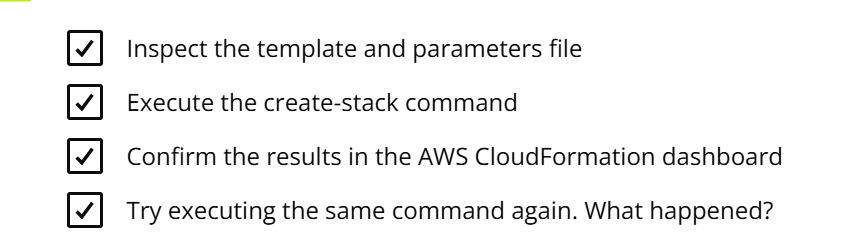

update-stack Command

Updates an existing CloudFormation stack from the specified template. Returns the StackId for the created stack, without waiting for the creation process to complete. We will use the same arguments we used for create-stack.

Task List

Let's try and modify the stack from our previous example.

aws cloudformation update-stack \
   --stack-name udacity-workflow-lesson \
   --template-body file://workflow-and-helpers.yml \
   --parameters file://workflow-and-helpers-parameters.json \
   --region us-east-1 

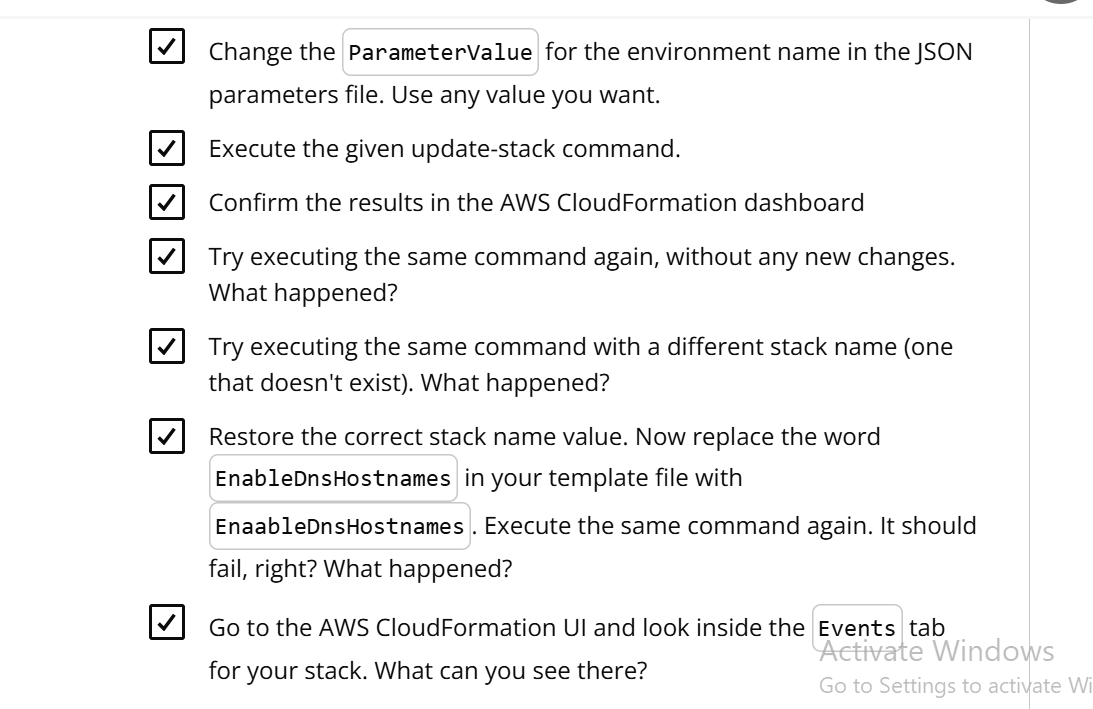

delete-stack Command
Deletes an existing CloudFormation stack from the specified template. Triggers deletion without waiting for the process to complete. We will only need to pass the stack-name and region parameters.

Task List

Now we can delete the stack from the previous examples.

In [ ]:
aws cloudformation delete-stack \
   --stack-name udacity-workflow-lesson \
   --region us-east-1 

deploy Command

This is a nice way to create your CloudFormation stacks, as this commands checks whether a stack exists with the stack name declared, and creates or updates it accordingly. It also wait for the CloudFormation execution to complete, reporting success or error.

Parameters are a bit different though, as we now pass the yml file without the file:// prefix to a parameter called template-file. Also, the parameters file argument is called parameter-overrides.

Task List

Let's use now the deploy command to recreate our stack.

aws cloudformation deploy \
   --stack-name udacity-workflow-lesson \
   --template-file workflow-and-helpers.yml \
   --parameter-overrides file://workflow-and-helpers-parameters.json \
   --region us-east-1 

The first time you execute deploy, CloudFormation creates the new stack. If you execute the command without changes to the resources, it realizes the stack is up to date and skips execution. If you execute the command again with template changes, it finds the existing stack and updates it. And if there are errors in the resource parameters, it let's you know it failed, although again after execution. Don't forget to cleanup by deleting the stack before continuing with the lesson.

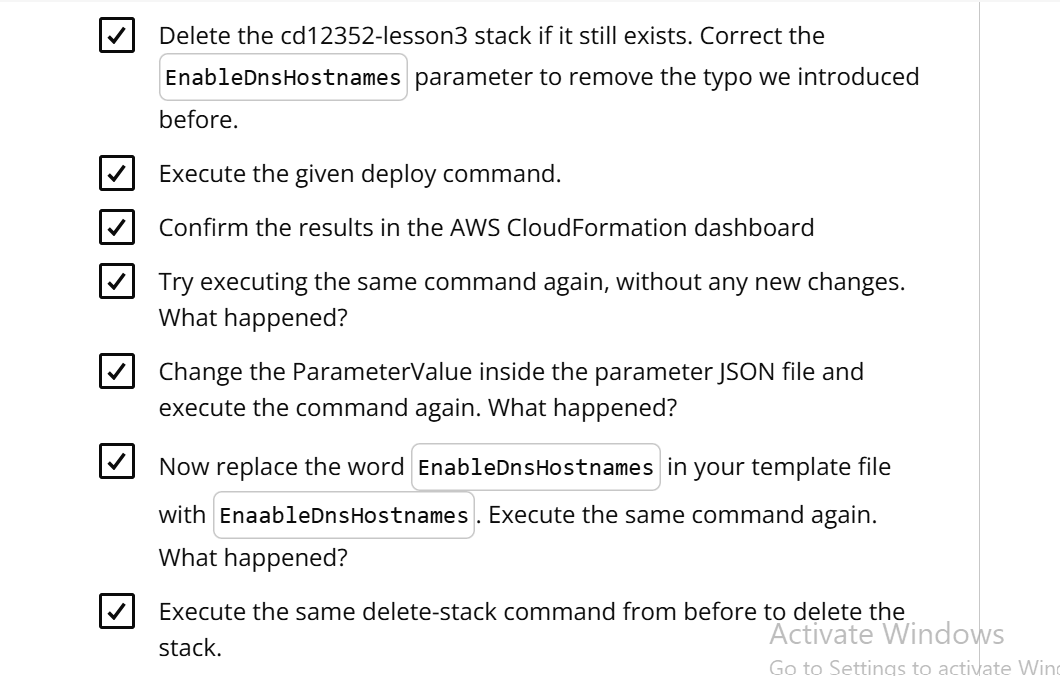

If you want to discover additional commands, you can find a link to the official CloudFormation CLI reference in the additional resources section below.

Scripting for Automation
A few scripts will help us create and update our stacks during this course. You will find them in this lesson's Workspace. They run the create, update, delete and deploy commands from this section.

create.sh: This file contains the create-stack command. Arguments: stack name, template file name, parameters file name.
update.sh: This file contains the update-stack command. update. Arguments: stack name, template file name, parameters file name.

An example execution would be:

In [ ]:
./create.sh udacity-workflow-lesson workflow-and-helpers.yml workflow-and-helpers-parameters.json

Troubleshooting permission errors
If you face permission errors while using either the create.sh or update.sh files, you will have to grant the execute permission to the owner (yourself) explicitly as:

chmod +x create.sh
chmod +x update.sh

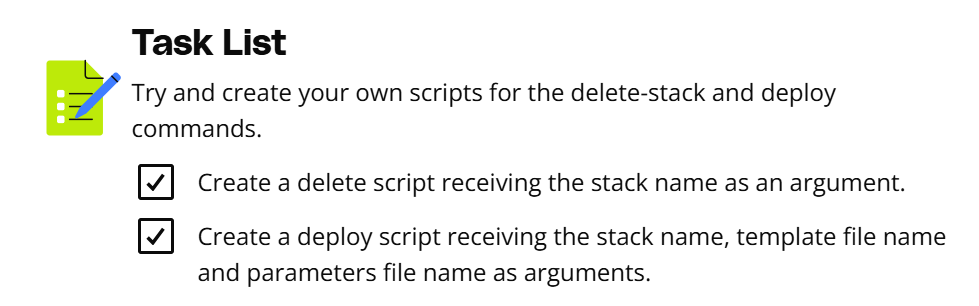

## Additional resources

https://awscli.amazonaws.com/v2/documentation/api/latest/reference/cloudformation/index.html

## VPC and Internet Gateway

## Creating Initial Files and Parameters

In the videos for this lesson, we will use the template files network.yml and network-parameters.json as a base to gradually build our own network template files: ourinfra.yml and ourinfra.json. We strongly encourage you to follow the video demonstrations as well as use the available exercises to validate your knowledge.

The commands to run for the creation and update of the demonstration stack are:

./create.sh ourdemoinfra ourinfra.yml ourinfra.json
./update.sh ourdemoinfra ourinfra.yml ourinfra.json

Let's start by creating the initial YML template and JSON parameter files for our lesson.

https://www.youtube.com/watch?v=Es5BXzhreMk

With our initial files and parameters in place, we can add the first resource to our template: the VPC. Let's see how this is done, and how this initial stack is created.

## Reviewing our VPC Creation
Next, we will add the VPC resource to our YML template. Let's review the creation process from the AWS CloudFormation dashboard.

https://www.youtube.com/watch?v=q2Nm8bdYC1A

We have just created our first resource in AWS! With the VPC in place, our next step is to create an Internet Gateway, so we can grant connectivity to our future resources.

## Reviewing our Internet Gateway Creation

Take a look at how we can add Internet Gateway resources to our template.

https://www.youtube.com/watch?v=fW6a0MZeuYg

Now that our template has both the InternetGateway and InternetGatewayAttachment resources, we can execute our update.sh command and trigger the update. Let's see how the update process looks from the AWS CloudFormation Console.

https://www.youtube.com/watch?v=VRZtsnpz2S8

Take a look at the resources block from our example:

Resources:

  VPC: 
    Type: AWS::EC2::VPC
    Properties:
      CidrBlock: !Ref VpcCIDR
      EnableDnsHostnames: true
      Tags: 
      - Key: Name 
        Value: !Ref EnvironmentName            

  InternetGateway:
    Type: AWS::EC2::InternetGateway
    Properties:
      Tags:
      - Key: Name
        Value: !Ref EnvironmentName

  InternetGatewayAttachment:
    Type: AWS::EC2::VPCGatewayAttachment
    Properties:
      InternetGatewayId: !Ref InternetGateway
      VpcId: !Ref VPC

It's important to note when connecting an Internet Gateway to a VPC, we need to define an additional resource called InternetGatewayAttachment. This attachment references both the VPC and the InternetGateway.

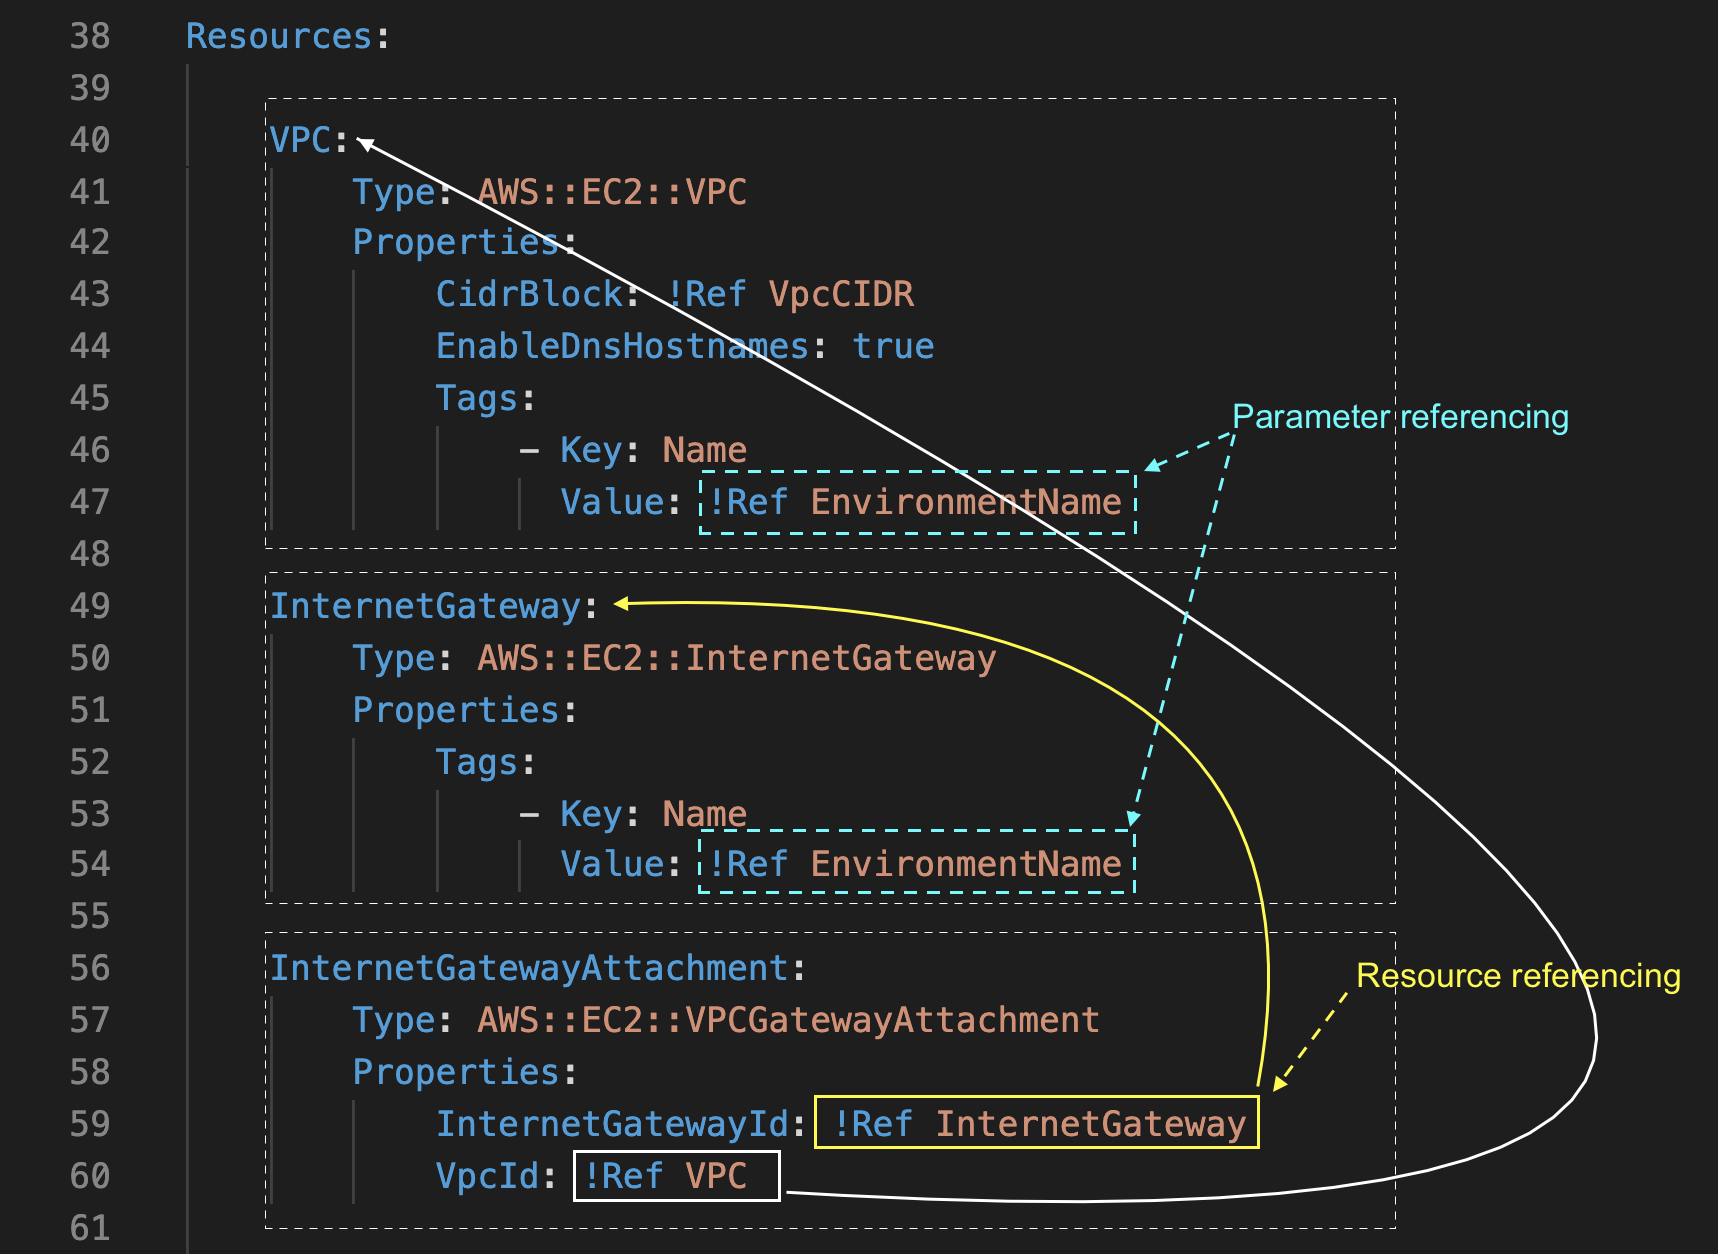

Referencing in the Resources section

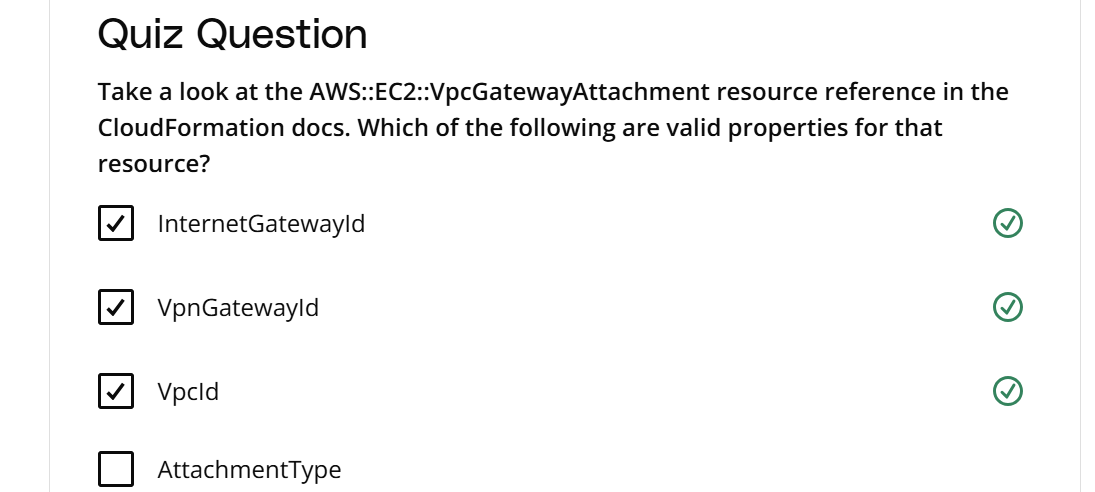

https://docs.aws.amazon.com/AWSCloudFormation/latest/UserGuide/AWS_EC2.html

https://docs.aws.amazon.com/AWSCloudFormation/latest/UserGuide/aws-resource-ec2-vpc.html

https://docs.aws.amazon.com/AWSCloudFormation/latest/UserGuide/aws-resource-ec2-vpccidrblock.html

https://docs.aws.amazon.com/AWSCloudFormation/latest/UserGuide/aws-resource-ec2-internetgateway.html

https://docs.aws.amazon.com/AWSCloudFormation/latest/UserGuide/aws-resource-ec2-vpc-gateway-attachment.html

 ## Exercise: Creating a Network for Your Startup

You have just started a startup with your best friend, and decided to use AWS to host your newly designed web application. Since you have all the DevOps know-how required, you will be in charge of all tasks related to AWS infrastructure. You begin by creating the network environment for your application.

## Exercise Prompt
Create a CloudFormation template that declares a VPC with an Internet Gateway attached.

Follow these specific requirements:

Use a JSON parameter file for your parameters.
Declare a variable called ProjectName. Think of any project name, and use that as your value. Use only lowercase and - for your value.
Your VPC and Internet Gateway name tags must match the name of your project.
Enable DNS hostnames for your VPC (go back and look at the VPC resource reference if needed).
Your VPC's CIDR block must be 10.2.0.0/16. Pass it as a parameter called VpcCIDR in the JSON file.

## Solution: Creating a Network for Your Startup

https://www.youtube.com/watch?v=ShrQBB1NHYI

## Subnets

Using Intrinsic Functions for our Subnets

https://www.youtube.com/watch?v=g2SKj19-dpg

Two new intrinsic functions make an appearance inside our subnet resource definitions:

Intrinsic function: Select
This function returns a single object from a list of objects by index.

Intrinsic function: GetAZs
This function returns a list of Availability Zones for a specified region in alphabetical order. If the region argument is empty (''), the region in which the CloudFormation stack is created is assumed.

In this example snippet, we're getting a list of our region's Availability Zones with !GetAZs, and using the !Select function to extract a single element of that list, using a specific index as argument.

AvailabilityZone: !Select [ 0, !GetAZs '' ]

## Reviewing our Subnets Creation

https://www.youtube.com/watch?v=6U3wzdT-wb4

Subnets Syntax

To specify a subnet for your VPC you can use the following syntax:

Type: AWS::EC2::Subnet
Properties: 
  AssignIpv6AddressOnCreation: Boolean
  AvailabilityZone: String
  CidrBlock: String
  Ipv6CidrBlock: String
  MapPublicIpOnLaunch: Boolean
  Tags: 
    - Tag
  VpcId: String

Adding Subnets to the VPC

Here is the actual setup of our 2 private subnets in different AZs:

In [ ]:
PrivateSubnet1: 
  Type: AWS::EC2::Subnet
  Properties:
    VpcId: !Ref VPC
    AvailabilityZone: !Select [ 0, !GetAZs '' ]
    CidrBlock: !Ref PrivateSubnet1CIDR
    MapPublicIpOnLaunch: false
    Tags: 
      - Key: Name 
        Value: !Sub ${EnvironmentName} Private Subnet (AZ1)

PrivateSubnet2: 
  Type: AWS::EC2::Subnet
  Properties:
    VpcId: !Ref VPC
    AvailabilityZone: !Select [ 1, !GetAZs '' ]
    CidrBlock: !Ref PrivateSubnet2CIDR
    MapPublicIpOnLaunch: false
    Tags: 
      - Key: Name 
        Value: !Sub ${EnvironmentName} Private Subnet (AZ2)

In [ ]:
Important Notes
!Ref VPC is referencing to the VPC created earlier.

!Ref PrivateSubnet1CIDR is referencing to the PrivateSubnet1CIDR parameter. Similarly, the PrivateSubnet2CIDR parameter is being used in the above code.

Notice that our private subnets are not sharing availability zones. We are keeping them separated as we displayed in our diagrams from the previous lesson.

For PrivateSubnet1, the!Select [ 0, !GetAZs '' ] is returning the first AZ from the list of all AZs in your region. Similarly, for PrivateSubnet2, the !Select [ 1, !GetAZs '' ] will return the second AZ.

Similar to the private subnets shown above, you will have to create two public subnets each in AZ0 and AZ1, except for the changed value in the field MapPublicIpOnLaunch: true. Marking this field as True will enable the Auto-assign public IP address field of the public subnet

Tags allow you to name your subnets, making easier to find them by manually inspecting your resources.

Our Diagram so far

Let's review how our diagram looks so far, considering what we have implemented already.

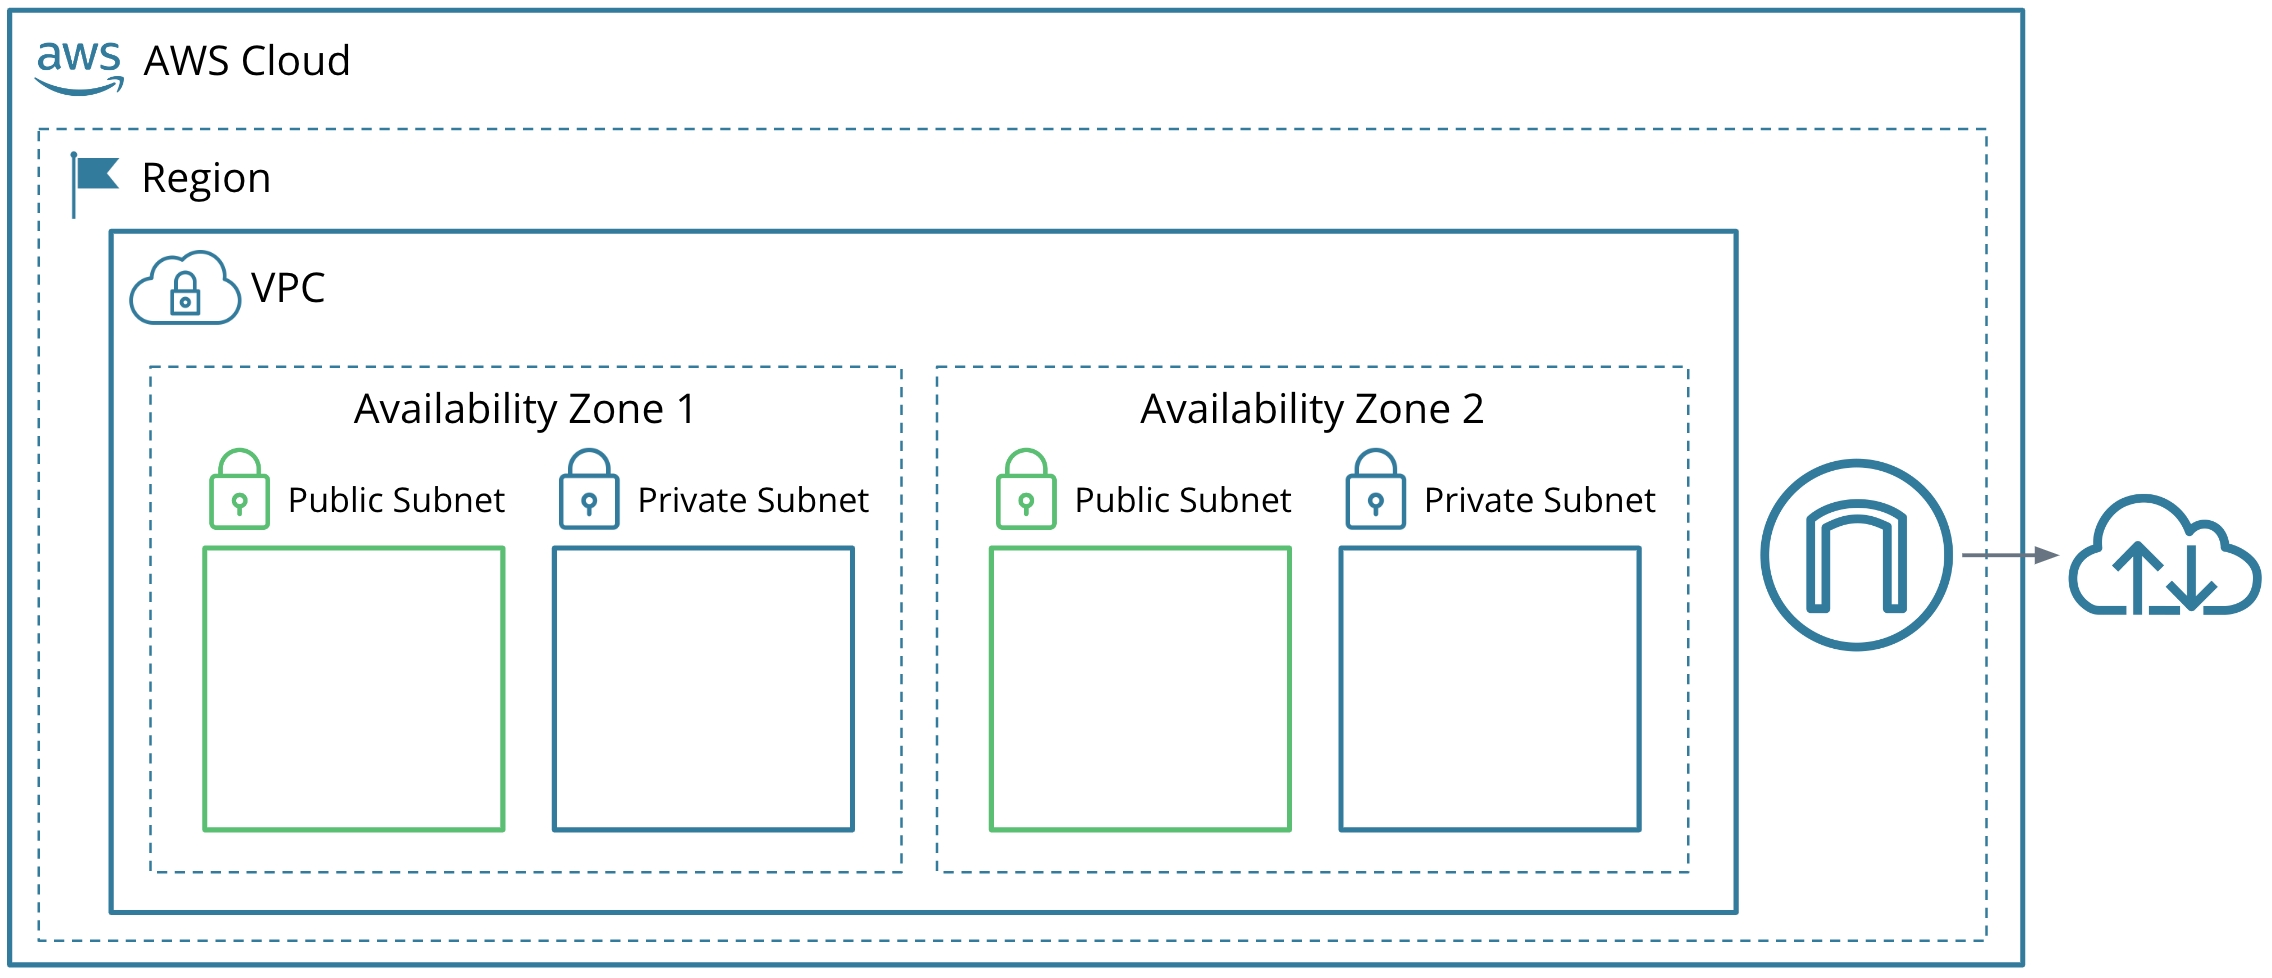

Current Diagram

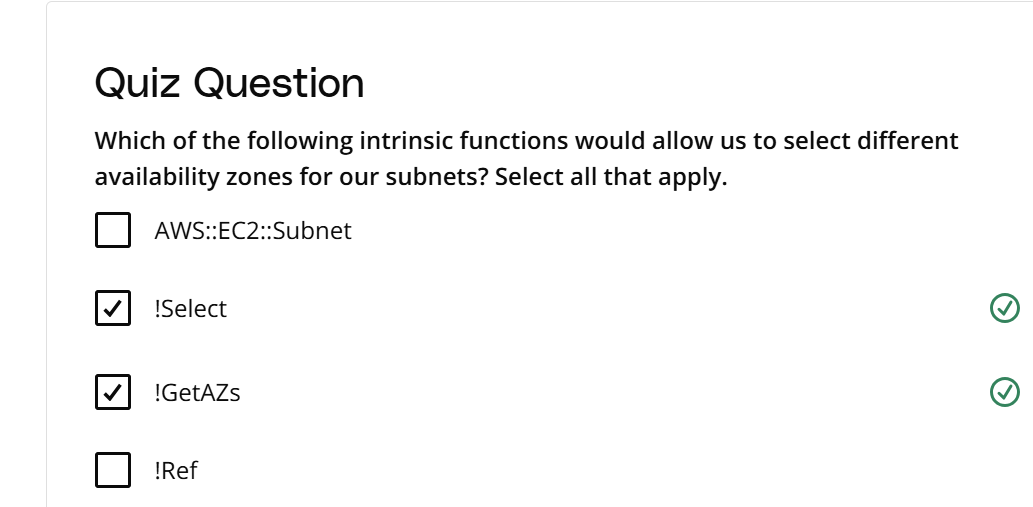

https://docs.aws.amazon.com/AWSCloudFormation/latest/UserGuide/aws-resource-ec2-subnet.html

https://docs.aws.amazon.com/es_es/AWSCloudFormation/latest/UserGuide/intrinsic-function-reference-getavailabilityzones.html

https://docs.aws.amazon.com/es_es/AWSCloudFormation/latest/UserGuide/intrinsic-function-reference-select.html

## Exercise: Partitioning Your Network

You have already created the network for your startup in the previous exercise. Now it's time to create subnets, guaranteeing high availability for your application!

Exercise Prompt
Use the CloudFormation files from the previous exercise. Add a pair of public and private subnets in different availability zones, using intrinsic functions.

Follow these specific requirements:

Pass all subnet CIDR blocks as parameters from the JSON parameters file.
Use /24 CIDR blocks for your subnets.
Follow high availability practices for both private and public subnets: don't deploy two of the same type of subnet in the same AZ. Use intrinsic functions for this.
Public subnet names must be ProjectName-public-1 and ProjectName-public-2, where ProjectName is the value of the ProjectName variable.
Private subnet names must be ProjectName-private-1 and ProjectName-private-2, where ProjectName is the value of the ProjectName variable.

## Solution: Partitioning Your Network

https://www.youtube.com/watch?v=Ev17p3y79Cg

## NAT Gateways

Requesting Elastic IPs for our NAT Gateways

https://www.youtube.com/watch?v=XeYVX9qmU_s

## Managing Dependency Relations with DependsOn
Sometimes we have dependency relationships between CloudFormation resources that need to be explicit in our template. Let's see how to solve this.

https://www.youtube.com/watch?v=KyYaGcT3200

CloudFormation automatically detects dependencies between resources. However, you can still use the DependsOn attribute to specify the order in which particular resources should be created or updated. If a resource has a dependency on another resource, CloudFormation will create or update the dependent resource only after the resource it depends on has been created or updated.



## Reviewing our NAT Gateways Creation

https://www.youtube.com/watch?v=vA4VuZHs7NU

NAT Gateway Syntax
The following code is the basic syntax for declaring a NAT Gateway:

Type: AWS::EC2::NatGateway
Properties: 
  AllocationId: String
  SubnetId: String

The AllocationID property is a reference to a AWS::EC2::EIP resource (Elastic IP), and it is necessary for NAT Gateways to work correctly when associated with the public subnets inside our VPC.

## Adding a NAT Gateway to our VPC
This is how we attach two NAT Gateways to our VPC, one for each public subnet.m

Resources:
  NatGateway1EIP:
    Type: AWS::EC2::EIP
    DependsOn: InternetGatewayAttachment
    Properties: 
      Domain: vpc

  NatGateway2EIP:
    Type: AWS::EC2::EIP
    DependsOn: InternetGatewayAttachment
    Properties:
      Domain: vpc

  NatGateway1: 
    Type: AWS::EC2::NatGateway
    Properties: 
      AllocationId: !GetAtt NatGateway1EIP.AllocationId
      SubnetId: !Ref PublicSubnet1

  NatGateway2: 
    Type: AWS::EC2::NatGateway
    Properties:
      AllocationId: !GetAtt NatGateway2EIP.AllocationId
      SubnetId: !Ref PublicSubnet2

The EIP in AWS::EC2::EIP stands for Elastic IP. This will give us a known/constant IP address to use instead of a disposable or ever-changing IP address. This is important when you have applications that depend on a particular IP address. NatGateway1EIP uses this type for that very reason.

Use the DependsOn attribute to protect your dependencies from being created without the proper requirements. In the scenario above the EIP allocation will only happen after the InternetGatewayAttachment has completed.

IMPORTANT: NAT Gateways have an hourly cost associated, so remember to delete them if you're not using them.

Our Diagram so far

Let's review how our diagram looks so far, considering what we have implemented already.

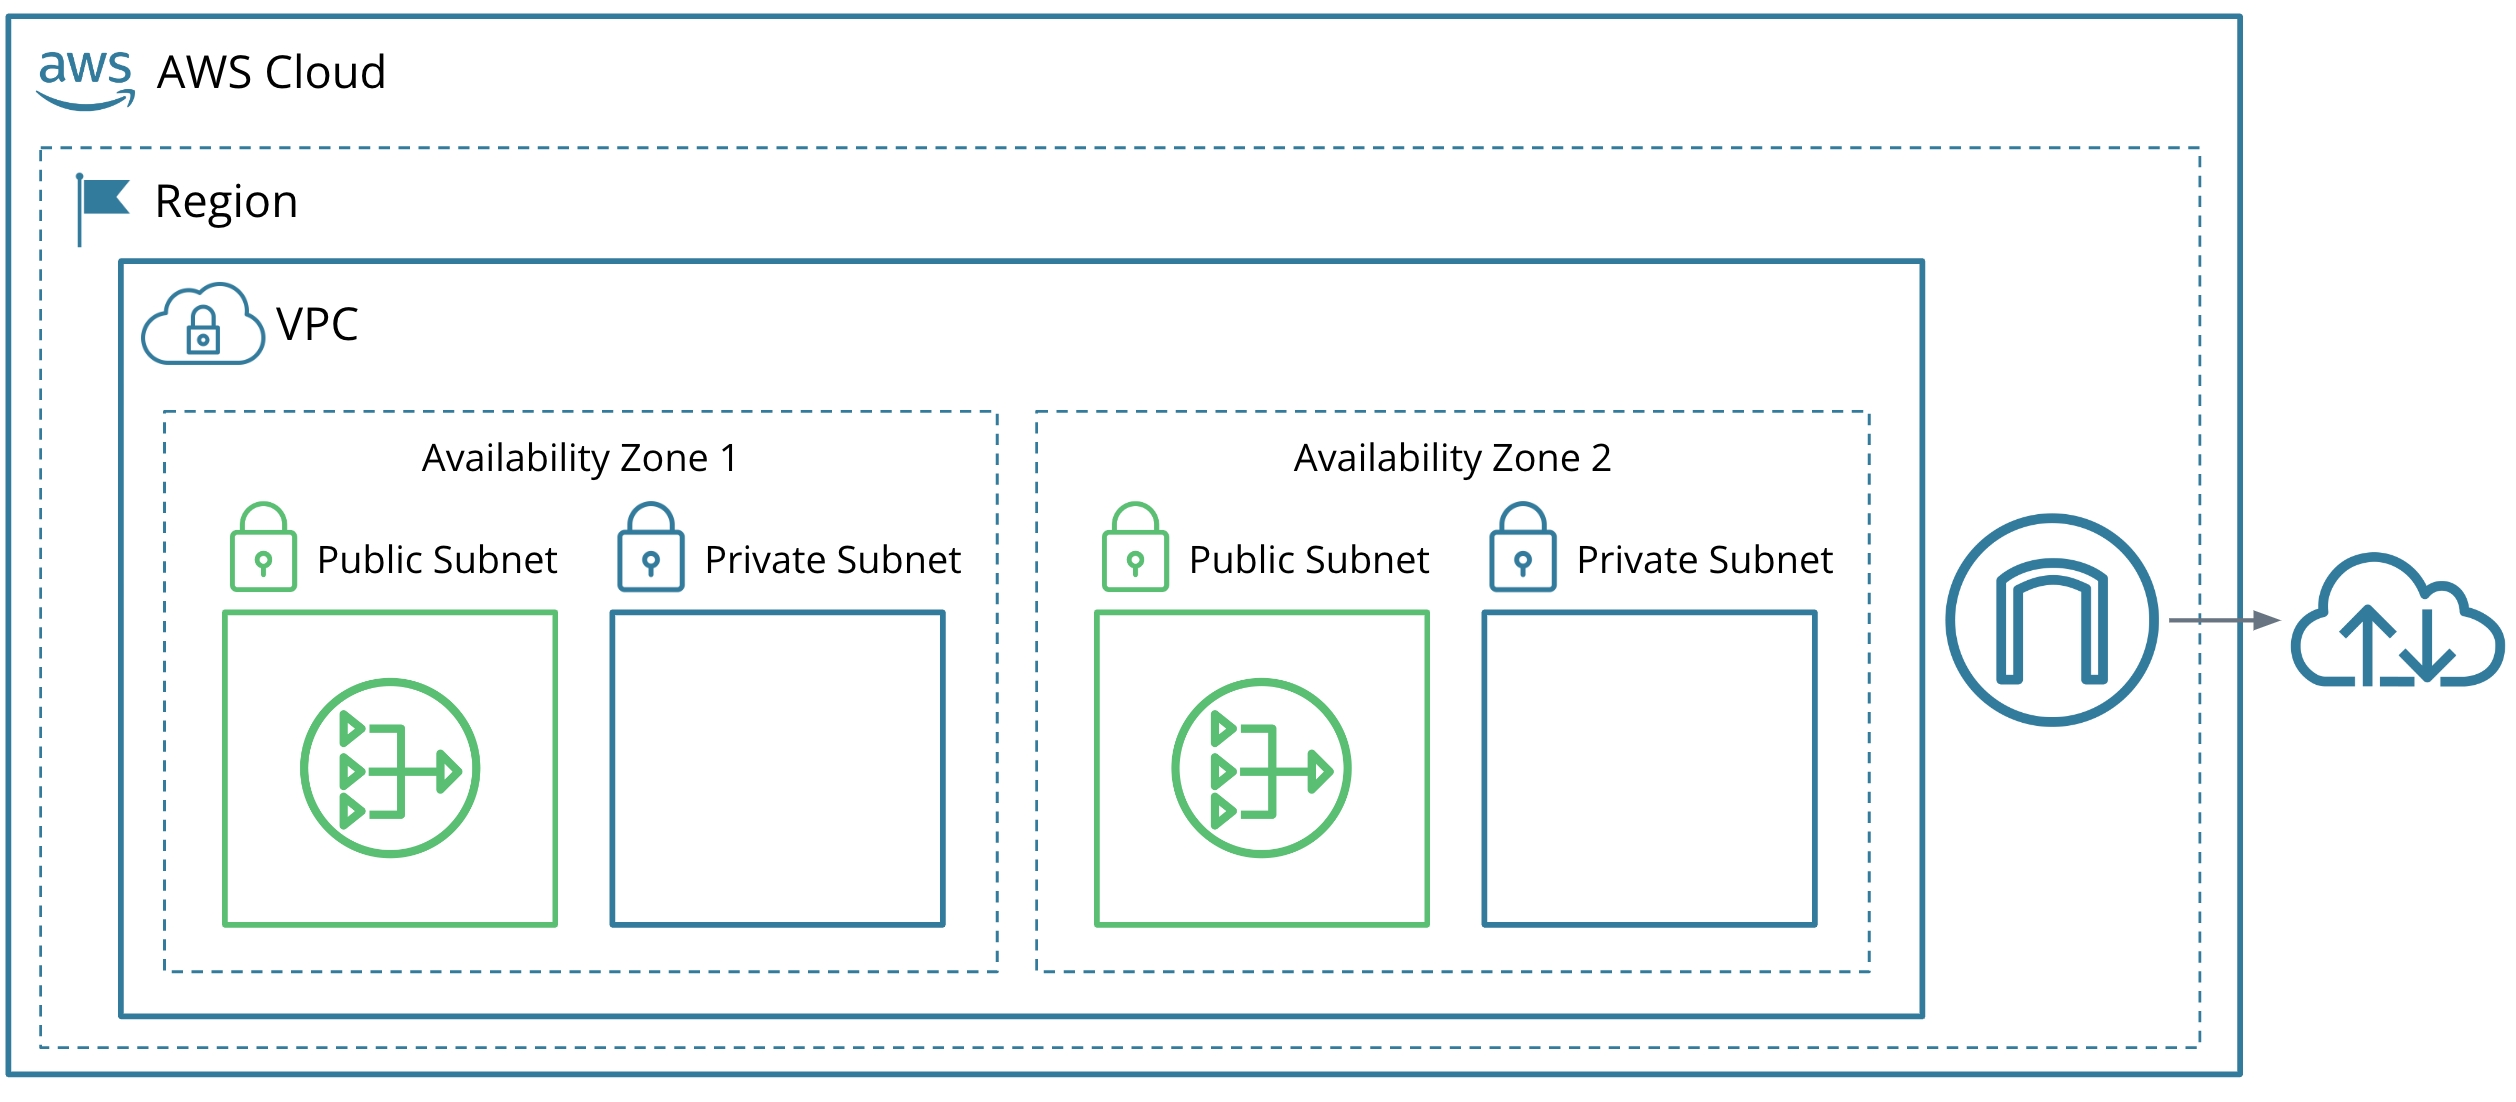

Current Diagram

Quiz Question

We want to add a NAT Gateway to our network. What is wrong with the following CloudFormation template snippet? Assume the MyPublicSubnet resource exists and is a correct public subnet.

 MyNatGatewayEIP:
    Type: AWS::EC2::EIP
    DependsOn: MyNatGateway
    Properties: 
      Domain: vpc

  MyNatGateway: 
    Type: AWS::EC2::NatGateway
    Properties: 
      AllocationId: !GetAtt MyNatGatewayEIP.AllocationId
      SubnetId: !Ref MyPublicSubnet

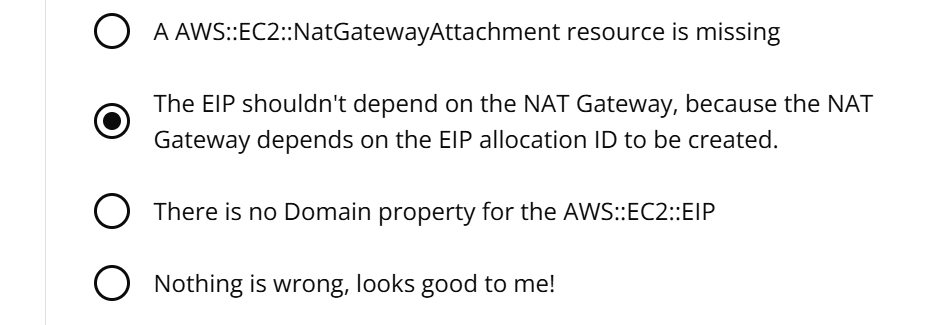

https://docs.aws.amazon.com/AWSCloudFormation/latest/UserGuide/aws-resource-ec2-natgateway.html

https://docs.aws.amazon.com/AWSCloudFormation/latest/UserGuide/aws-resource-ec2-eip.html

https://docs.aws.amazon.com/AWSCloudFormation/latest/UserGuide/aws-attribute-dependson.html

## Exercise: Adding NAT Gateways to Your Network

Your new application's network looks good, but you know you will have some private servers and databases you will be interested in protecting from Internet access, so it will be a good idea to include NAT Gateways in your architecture.

Exercise Prompt
Use the CloudFormation files from the previous exercise. Add two public NAT Gateways with their Elastic IPs attached to them so they work properly in your subnets.

Follow these specific requirements:

Follow high availability practices to deploy both NAT Gateways in different availability zones.
Use name tags for your Elastic IPs, tagging them as ProjectName-nat-gateway-1 and ProjectName-nat-gateway-2, where ProjectName is the value of the ProjectName variable.
Use name tags for your NAT Gateways, tagging them as ProjectName-nat-gateway-1 and ProjectName-nat-gateway-2, where ProjectName is the value of the ProjectName variable.
IMPORTANT
This exercise solution includes NAT Gateways. They have an hourly charge associated. Remember to delete your stack after completion.

## Solution: Adding NAT Gateways to your network

https://www.youtube.com/watch?v=ibqfEni1JSA

## Routing

This section will create the following route tables in our VPC and attach each of them to individual subnets, as mentioned below.

PublicRouteTable - This route table will have a default rule (AWS::EC2::Route) to allow all outbound traffic routed to the internet gateway. Next, we will attach this route table (AWS::EC2::SubnetRouteTableAssociation) to both our public subnets.
PrivateRouteTable1 - This route table will have a default rule (AWS::EC2::Route) to route all outbound traffic to the NAT gateway (NatGateway1). We will associate this route table to the PrivateSubnet1.
PrivateRouteTable2 - This route table is similar in nature to PrivateRouteTable1, except that it is routing the traffic to the NatGateway2, and will be attached to the PrivateSubnet2.
To achieve this, we will add and review three types of AWS resources, created in the following order:

Route tables, in which we will add our routing rules.
Route rules, for each specific routing behavior
Subnet route table associations, required to attach a route table to our network

## Adding Routing to our Template

Route Tables
The following is the syntax used to define a route table:

Type: AWS::EC2::RouteTable
Properties: 
  VpcId: String
  Tags:
    - Tag

Adding Route Tables to your network

Resources:
  PublicRouteTable:
    Type: AWS::EC2::RouteTable
    Properties: 
      VpcId: !Ref VPC
      Tags: 
        - Key: Name 
          Value: !Sub ${EnvironmentName} Public Routes

To create PrivateRouteTable1 and PrivateRouteTable2, we use the same resource definition, changing only the tag name.

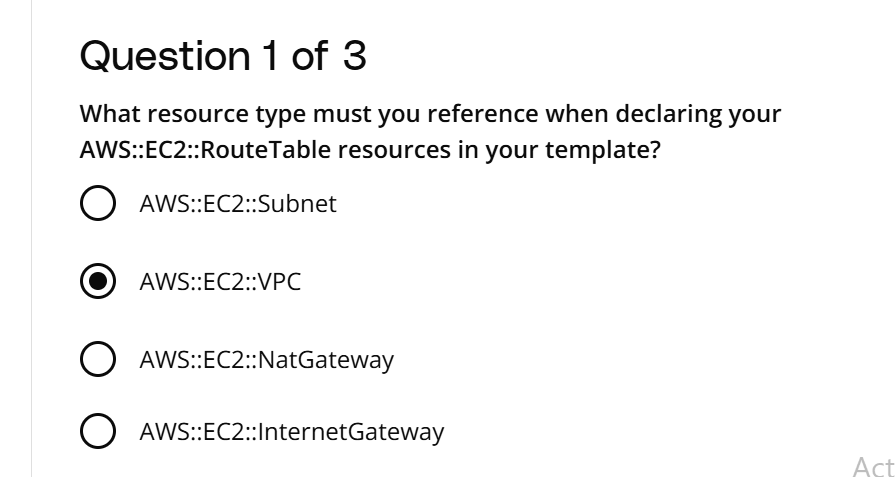

Routes
The following is the syntax used to set up a route:

Type: AWS::EC2::Route
Properties: 
  DestinationCidrBlock: String
  GatewayId: String
  NatGatewayId: String
  RouteTableId: String

In the syntax above, the DestinationCidrBlock property is used for destination matching and a wildcard address (0.0.0/0) to reference all traffic.

You can only use NatGatewayId or GatewayId in a single resource. This property defines the next hop for the route, so it can't be both.

The default public route: in the following example, the wildcard address 0.0.0.0/0 is used to route all requests destined for any IP address, to the referenced GatewayId.

Resources:
  DefaultPublicRoute: 
    Type: AWS::EC2::Route
    DependsOn: InternetGatewayAttachment
    Properties: 
      RouteTableId: !Ref PublicRouteTable
      DestinationCidrBlock: 0.0.0.0/0
      GatewayId: !Ref InternetGateway

The default private route can be defined as:



Resources:
  DefaultPrivateRoute1:
    Type: AWS::EC2::Route
    Properties:
      RouteTableId: !Ref PrivateRouteTable1
      DestinationCidrBlock: 0.0.0.0/0
      NatGatewayId: !Ref NatGateway1

The route above is attached to the PrivateRouteTable1 and is routed via NatGateway1. You can create the DefaultPrivateRoute2 for PrivateRouteTable2 similar to the code shown above.

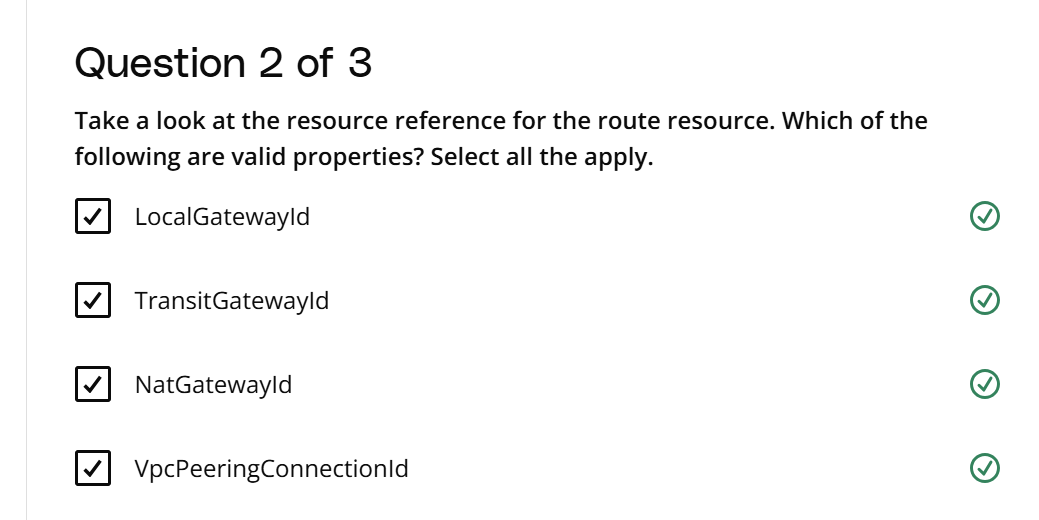

Associating Route Tables with our Subnets

https://www.youtube.com/watch?v=t9viU9vNJTc

SubnetRouteTableAssociation

In order to associate subnets with our route table, we will need to use a SubnetRouteTableAssociation resource using the following syntax:

Type: AWS::EC2::SubnetRouteTableAssociation
Properties: 
  RouteTableId: String
  SubnetId: String

  SubnetId: String
This only takes two properties, which are the ids used for our RouteTable and our Subnet.

Associate Route Table to a Subnet

Resources:
  PublicSubnet1RouteTableAssociation:
    Type: AWS::EC2::SubnetRouteTableAssociation
    Properties:
      RouteTableId: !Ref PublicRouteTable
      SubnetId: !Ref PublicSubnet1

Similarly, we can associate the rest of the three subnets to each of its intended route tables.

Important Note: Routes should be defined starting with the most specific rule and transitioning to the least specific rule.

## Reviewing our Routing Resources Creation

https://www.youtube.com/watch?v=2l7qKwPlesc

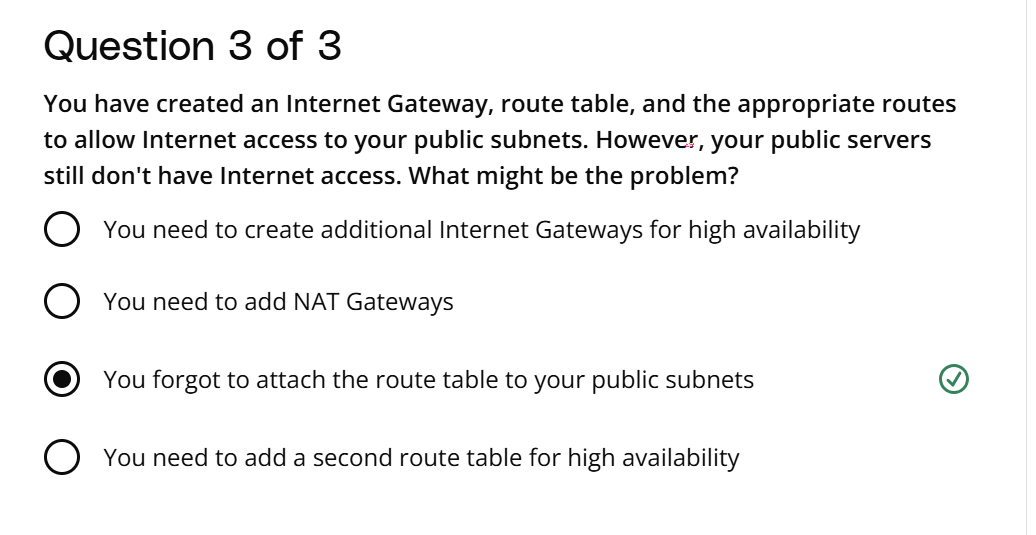

## Our network diagram
Now we have our network diagram ready. Let's see how it looks up to this point.

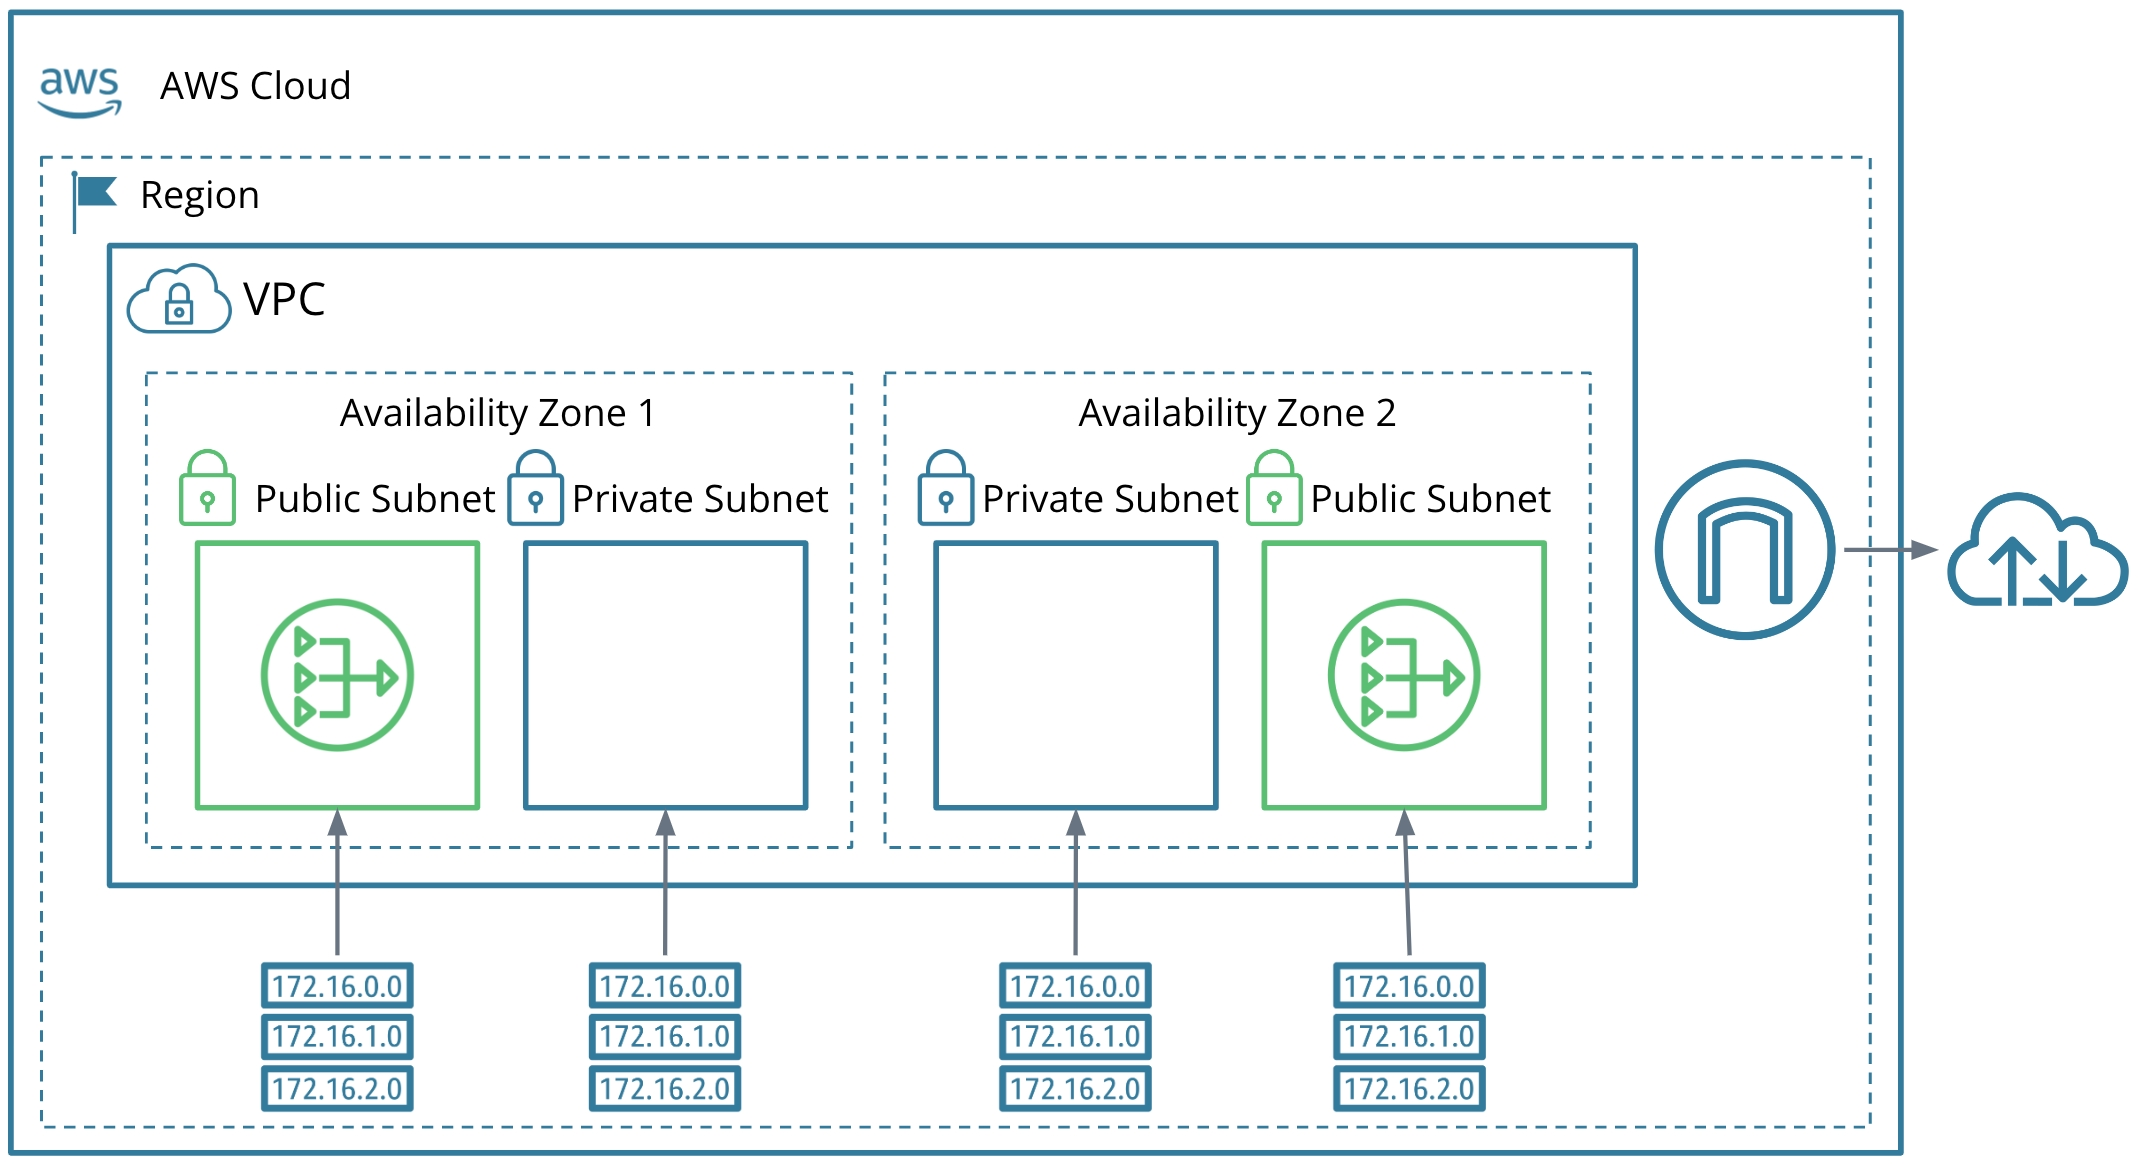

Network Diagram

https://docs.aws.amazon.com/vpc/latest/userguide/VPC_Route_Tables.html

https://docs.aws.amazon.com/AWSCloudFormation/latest/UserGuide/aws-resource-ec2-routetable.html

https://docs.aws.amazon.com/AWSCloudFormation/latest/UserGuide/aws-resource-ec2-route.html

https://docs.aws.amazon.com/AWSCloudFormation/latest/UserGuide/aws-resource-ec2-subnet-route-table-assoc.html

## Exercise: Routing Your Application's Network

You surely know the drill by now! For your network resources to properly connect with each other and interact with the gateway resources you've created.

Exercise Prompt
Use the CloudFormation files from the previous exercise. Create route tables and route table rules for your networks.

Follow these specific requirements:

Add a single route table to your public subnets, including a default route to your Internet Gateway route.
Add one route table per private subnet, including a default route to the NAT Gateways inside the same subnet.
Route tables must be correctly associated to their subnets.
Use name tags for your route tables, tagging them as ProjectName-public , ProjectName-private-1 and ProjectName-private-1 accordingly, where ProjectName is the value of the ProjectName variable.
Use name tags for your NAT Gateways, tagging them as ProjectName-nat-gateway-1 and ProjectName-nat-gateway-2, where ProjectName is the value of the ProjectName variable.
Important!
This exercise solution includes NAT Gateways. They have an hourly charge associated. Remember to delete your stack after completion.

## Solution: Routing Your Application's Network

https://www.youtube.com/watch?v=rnNLiXFHvAs

## Outputs

We are almost done with our network template for this lesson. We will add our application resources in a separate template. But those application resources will need to know some internal ids for resources like our VPC, private and public subnets, and so forth.

Since these ids are created and handled by the network stack, we will need to add CloudFormation outputs there, so we can later import them into the application template.

## Communicating Stacks Using Outputs

https://www.youtube.com/watch?v=KeFVml7-9Po

## Reviewing our Outputs Creation
Let's see now how outputs get created in AWS.

https://www.youtube.com/watch?v=LNSbzpHlXn8

## Outputs
Optional section of your templates. Use them to declare output values you can later import into other stacks. It helps us prevent hardcoding. For example, if you create a VPC in your stack, you can output its VPC ID and then use it as a variable in another stack, creating resources inside that VPC.

This is how you would declare outputs in a template:

Outputs:
  VpcId:
    Description: A reference to the created VPC
    Value: !Ref VPC
    Export:
      Name: !Sub ${EnvironmentName}-VPCID

Logical ID: unique template identifier for your output. In our example: VpcId

Description: optional text describing the output.

Value: mandatory, defines the value of the output. In our example, !Ref VPC, which is a reference to the physical ID of the created VPC resource.

Export: name of the output, to be imported inside other stacks. The name must be unique within a region. In our example, MyStackVpcId.

If you were to use this output in another template, you would use the !ImportValue intrinsic function:

!ImportValue MyStackVpcId

We will meet this intrinsic function in our next lesson. In the meantime, there's another intrinsic function that comes in handy.

In [ ]:
Intrinsic Function: Join
You can use the join function to combine a group of values. The syntax requires you provide a delimiter and a list of values you want appended.

Join function syntax:

Fn::Join: [ delimiter, [ comma-delimited list of values ] ]
In the following example we are using !Join to combine our subnets before returning their values:

In [ ]:
Outputs:
  PublicSubnets:
    Description: A list of the public subnets
    Value: !Join [ ",", [ !Ref PublicSubnet1, !Ref PublicSubnet2 ]]
      Export:
        Name: !Sub ${EnvironmentName}-PUB-NETS

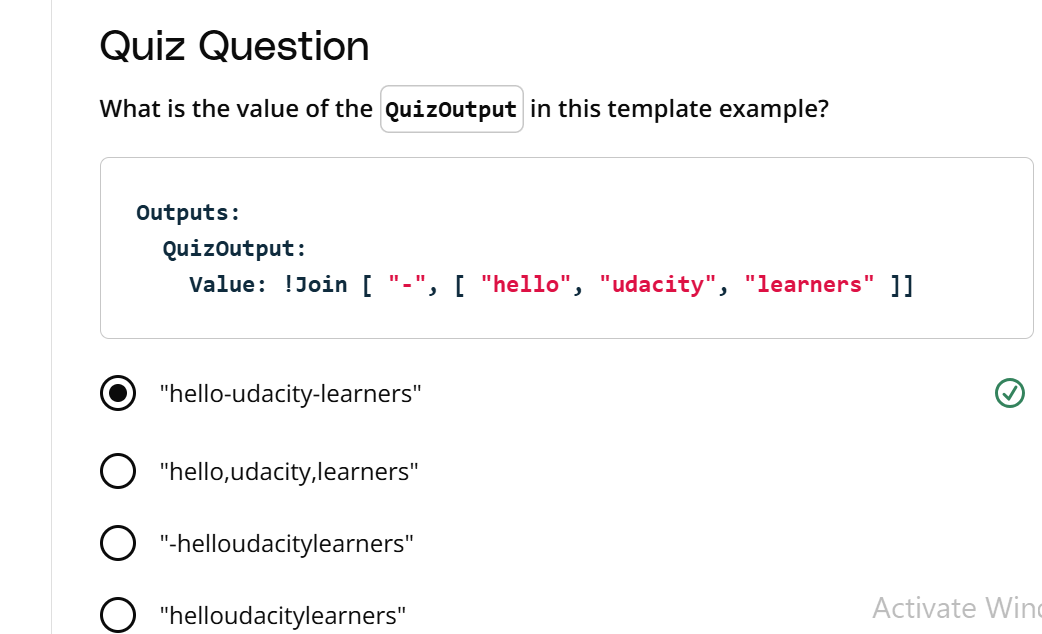

https://docs.aws.amazon.com/AWSCloudFormation/latest/UserGuide/outputs-section-structure.html

https://docs.aws.amazon.com/AWSCloudFormation/latest/UserGuide/intrinsic-function-reference-join.html

## Exercise: Creating a Reusable Network Template

You've finished the network CloudFormation template for your new application. However, you know that many of the IDs from your resources will be useful for future templates creating application resources on top of your networks. So let's export some outputs we can share with those templates.

Exercise Prompt
Use the CloudFormation files from the previous exercise. Follow these specific requirements, replacing ProjectName with the value of the ProjectName variable:

Export your VPC ID with the name ProjectName-vpc-id.
Export each of your subnet IDs with the names ProjectName-public-subnet1, ProjectName-public-subnet2, ProjectName-private-subnet1 and ProjectName-private-subnet2
Export a string of comma-separated public subnet IDs with the name ProjectName-public-subnets
Export a string of comma-separated private subnet IDs with the name ProjectName-private-subnets
The Join function will be helpful here!

Important!
This exercise solution includes NAT Gateways. They have an hourly associated charge. Remember to delete your stack after completion.

## Solution: Creating a Reusable Network Template

https://www.youtube.com/watch?v=7i-6g7zAwkE

## Conclusion

https://www.youtube.com/watch?v=aq9xZ-fcRiY

Summary
As this lesson comes to an end, you should now be able to:

Use the AWS CloudFormation CLI to trigger infrastructure deployments.
Deploy basic networking AWS resources using CloudFormation (VPC, subnets, gateways, and routing).
Parametrize your CloudFormation stacks using a JSON file.
Communicate CloudFormation stacks using template outputs.